In [155]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
print(f"numpy version: {np.__version__}")
print(f"scipy version: {sp.__version__}")
print(f"matplotlib version: {plt.matplotlib.__version__}")

numpy version: 2.2.3
scipy version: 1.15.2
matplotlib version: 3.10.1


In [156]:
# estimating population parameters using random samples

n = 1000
y = np.random.normal(loc=100, scale=15, size=n)
print(f"sample = {y[0:10].round(2)}")
print(f"sample mean = {y.mean():.2f}")
print(f"sample sd =  {y.std():.2f}")

# standard error of the mean (SEM)
# SEM is the standard deviation of the theoretical distribution of the sample means
# (otherwise known as the "sampling distribution of means")

sem = y.std() / math.sqrt(n)
print(f"standard error of the mean = {sem:.2f}")

sample = [110.19 128.17  89.5  131.48  86.62  91.96  94.7  106.37 101.53 117.56]
sample mean = 100.25
sample sd =  14.43
standard error of the mean = 0.46


100%|██████████| 10000/10000 [00:00<00:00, 260438.13 simulation /s]


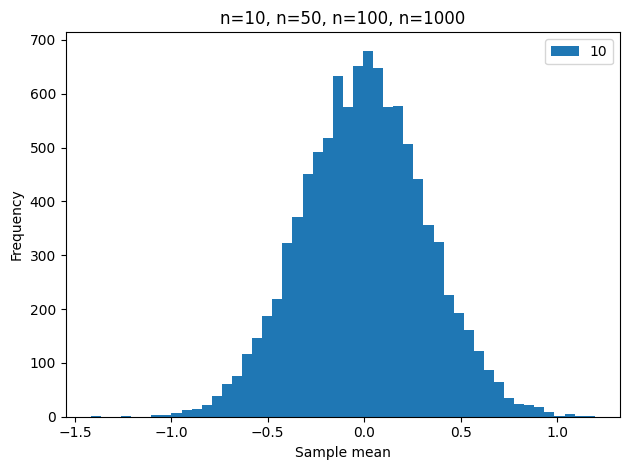

In [157]:
# illustration of the role of sample size

samp_sizes = [10]
#samp_sizes = [10, 50, 100, 1000]
nsims = 10000
for n in samp_sizes:
    ymeans = np.zeros(nsims)
    for i in tqdm(range(nsims), unit = " simulation "):
        y = np.random.normal(0, 1, n)
        ymeans[i] = np.mean(y)
    plt.hist(ymeans, bins=50)
plt.xlim = (-1.1, 1.1)
plt.legend(samp_sizes)
plt.title("n=10, n=50, n=100, n=1000")
plt.xlabel("Sample mean")
plt.ylabel("Frequency")
plt.tight_layout()

Correlation between x and y: 0.6725539616490789


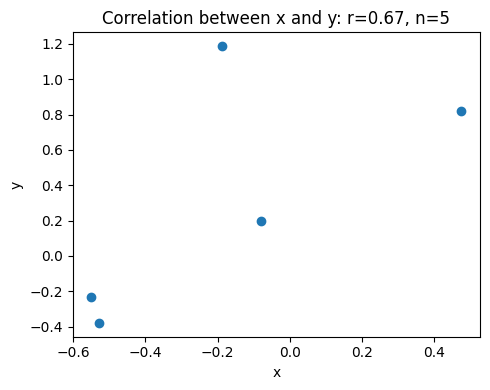

In [158]:
# correlations under the null hypothesis

n = 5
x = np.random.normal(0, 1, n)
y = np.random.normal(0, 1, n)
r = sp.stats.pearsonr(x, y)[0]
print(f"Correlation between x and y: {r}")
plt.figure(figsize=(5,4))
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Correlation between x and y: r={r.round(2)}, n={n}")
plt.tight_layout()

100%|██████████| 10000/10000 [00:00<00:00, 15906.39 simulations /s]


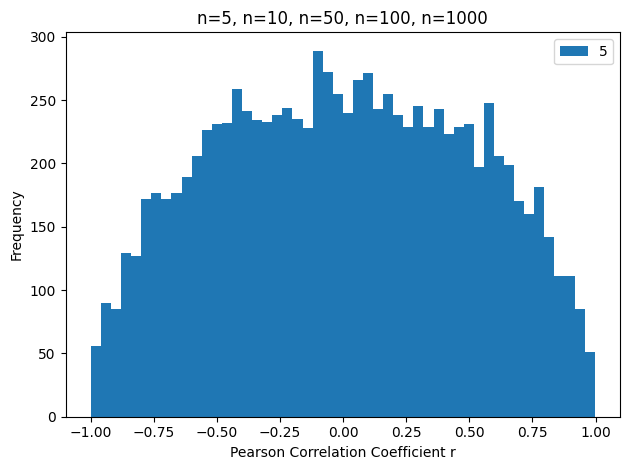

In [159]:
# correlations & sample size

samp_sizes = [5]
#samp_sizes = [5, 10, 50, 100, 1000]
nsims = 10000
for n in samp_sizes:
    rvalues = np.zeros(nsims)
    for i in tqdm(range(nsims), unit=" simulations "):
        y1 = np.random.normal(0, 1, n)
        y2 = np.random.normal(0, 1, n)
        rvalues[i] = sp.stats.pearsonr(y1, y2)[0]
    plt.hist(rvalues, bins=50)
plt.xlim = (-1.1, 1.1)
plt.legend(samp_sizes)
plt.title("n=5, n=10, n=50, n=100, n=1000")
plt.xlabel("Pearson Correlation Coefficient r")
plt.ylabel("Frequency")
plt.tight_layout()

In [160]:
# null hypothesis significance testing
# H0 true

pop_mean   = 100
pop_sd     = 15
pop_effect =  0   # <--- the actual effect of the drug
n          = 10
placebo = (np.random.randn(n) * pop_sd) + pop_mean
drug    = (np.random.randn(n) * pop_sd) + pop_mean + pop_effect
placebo, drug = placebo.round(decimals=0), drug.round(decimals=0)
print(f"placebo : {placebo}")
print(f"drug    : {drug}")
print(f"placebo mean : {placebo.mean()}")
print(f"drug mean    : {drug.mean()}")
results = sp.stats.ttest_ind(drug, placebo) # independent samples t-test
print(f"t({results.df}) = {results.statistic.round(2)}, p = {results.pvalue.round(5)}")

placebo : [120.  82. 105.  89. 112. 104.  88. 126. 105. 122.]
drug    : [123. 113. 100.  98.  99.  91.  99. 116. 146. 107.]
placebo mean : 105.3
drug mean    : 109.2
t(18.0) = 0.56, p = 0.58546


In [161]:
# null hypothesis significance testing
# H0 false

pop_mean   = 100
pop_sd     = 15
pop_effect =  8   # <--- the actual effect of the drug
n          = 10
placebo = (np.random.randn(n) * pop_sd) + pop_mean
drug    = (np.random.randn(n) * pop_sd) + pop_mean + pop_effect
placebo, drug = placebo.round(decimals=0), drug.round(decimals=0)
print(f"placebo : {placebo}")
print(f"drug    : {drug}")
print(f"placebo mean : {placebo.mean()}")
print(f"drug mean    : {drug.mean()}")
results = sp.stats.ttest_ind(drug, placebo) # independent samples t-test
print(f"t({results.df}) = {results.statistic.round(2)}, p = {results.pvalue.round(5)}")

placebo : [103.  84. 121.  93. 114.  92.  74.  89. 108. 103.]
drug    : [104. 104. 115.  98. 120. 131. 146. 114. 113. 122.]
placebo mean : 98.1
drug mean    : 116.7
t(18.0) = 2.92, p = 0.0091


In [162]:
# function to simulate one experiment
def simulate_experiment(n=10, pop_effect=0, alpha=0.05, pop_mean=100, pop_sd=15, verbose=False):
    placebo = (np.random.randn(n) * pop_sd) + pop_mean
    drug    = (np.random.randn(n) * pop_sd) + pop_mean + pop_effect
    placebo, drug = placebo.round(decimals=0), drug.round(decimals=0)
    results = sp.stats.ttest_ind(drug, placebo) # independent samples t-test
    if (results.pvalue < alpha):
        results.decision = "H1"
    else:
        results.decision = "H0"
    if (verbose==True):
        print(f"placebo : {placebo}")
        print(f"drug    : {drug}")
        print(f"placebo mean : {placebo.mean()}")
        print(f"drug mean    : {drug.mean()}")
        print(f"t({results.df}) = {results.statistic.round(2)}, p = {results.pvalue.round(5)}")
    return results

In [163]:
results = simulate_experiment(pop_effect = 8, verbose=True)

placebo : [ 95.  96.  80. 110.  65. 122.  82. 111. 113. 111.]
drug    : [117. 122. 118. 115. 118. 110. 102. 122.  97. 120.]
placebo mean : 98.5
drug mean    : 114.1
t(18.0) = 2.46, p = 0.02421


100%|██████████| 10000/10000 [00:04<00:00, 2425.22 experiments /s]


you made a type I error 4.8 % of the time 


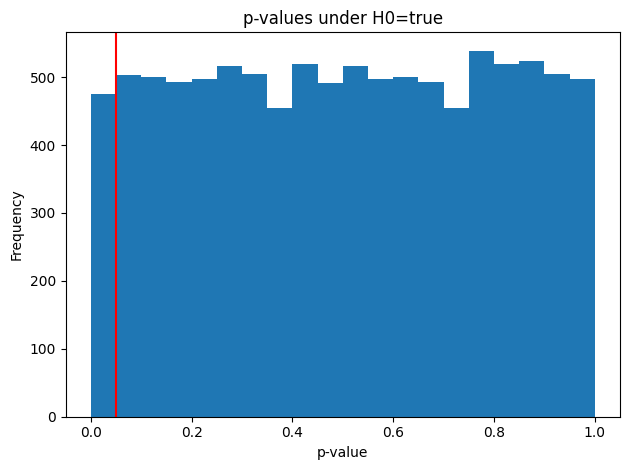

In [164]:
# simulate many experiments under the null hypothesis

mean_diff =  0
n         = 10
pop_sd    = 15
alpha     = 0.05

n_simulations = 10000
p_values = np.zeros(n_simulations)
decision = np.zeros(n_simulations) # 0=H0, 1=H1
for i in tqdm(range(n_simulations), unit=" experiments "):
    results = simulate_experiment(n=n, alpha=alpha, pop_sd=pop_sd, pop_effect=mean_diff, verbose=False)
    p_values[i] = results.pvalue
    decision[i] = results.decision=="H1"
plt.hist(p_values, bins=20)
plt.xlim = (0,1)
plt.title("p-values under H0=true")
plt.xlabel("p-value")
plt.ylabel("Frequency")
plt.axvline(alpha, color="red")
plt.tight_layout()

type_I_errors = sum(decision)/n_simulations
print(f"you made a type I error {type_I_errors*100:.1f} % of the time ")

100%|██████████| 10000/10000 [00:04<00:00, 2400.12 experiments /s]


you made a type II error 80.2 % of the time 
your statistical power was 0.2


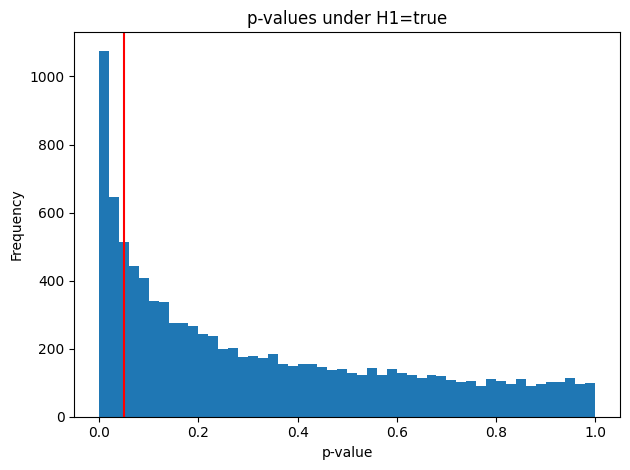

In [165]:
# simulate many experiments under the alternate hypothesis

mean_diff =  8
n         = 10
pop_sd    = 15
alpha     = 0.05

n_simulations = 10000
p_values = np.zeros(n_simulations)
decision = np.zeros(n_simulations) # 0=H0, 1=H1
for i in tqdm(range(n_simulations), unit=" experiments "):
    results = simulate_experiment(n=n, alpha=alpha, pop_sd=pop_sd, pop_effect=mean_diff, verbose=False)
    p_values[i] = results.pvalue
    decision[i] = results.decision=="H1"
plt.hist(p_values, bins=50)
plt.xlim = (0,1)
plt.title("p-values under H1=true")
plt.xlabel("p-value")
plt.ylabel("Frequency")
plt.axvline(alpha, color="red")
plt.tight_layout()

type_II_errors = sum(decision==0)/n_simulations
print(f"you made a type II error {type_II_errors*100:.1f} % of the time ")
print(f"your statistical power was {1-type_II_errors:.1f}")